In [1]:
cd ~/imCPA

/mnt/home/icb/alessandro.palma/imCPA


In [2]:
# Import the files 
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from PIL import Image
import timeit,time
from compert.plot_utils import Plotter 
import torch
from compert.training_utils import *
import json
import sys

In [3]:
config = Config(config_path = '/home/icb/alessandro.palma/imCPA/configs/config_sigma_vae.json')

In [4]:
t = Trainer(config)

Working on device: cuda
Lodading the data...
Successfully loaded the data
Create output directories for the experiment


Beginning training with epochs 1


100%|██████████| 2957/2957 [00:35<00:00, 82.68it/s]

Average validation loss: 20870.761305085623
rmse = 0.3696448881863177
precision = 2.650318091177303e-07
recall = 0.0007836990595611285
F1 = 5.298844216099584e-07
bpd = -0.6022028766884859
rmse_basal_full = 0.016980275511741638


New best score is -0.6022028766884859


/home/icb/alessandro.palma/miniconda3/envs/imgCPA/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Save new checkpoint at /home/icb/alessandro.palma/results/try_new_saves/first_experiment_compert_20220311-182206/checkpoint


100%|██████████| 2957/2957 [00:35<00:00, 84.12it/s]


Training discriminator network on drug latent space


100%|██████████| 400/400 [00:18<00:00, 22.01it/s]


Training discriminator network on drug latent space
Training discriminator network on drug latent space


100%|██████████| 400/400 [00:18<00:00, 21.50it/s]


Training discriminator network on drug latent space
Average validation loss: 20870.797386130733
rmse = 0.36964514612708094
precision = 2.650318091177303e-07
recall = 0.0007836990595611285
F1 = 5.298844216099584e-07
bpd = -0.6022039177673829
rmse_basal_full = 0.016980277374386787
disentanglement_score_basal = 1.0
disentanglement_score_z = 0.987149178981781
difference_disentanglement = 0.012850821018218994
silhouette_score_basal = -0.17043685913085938
silhouette_score_z = 0.7167432308197021
difference_silhouette = 0.8871800899505615


  0%|          | 0/9185 [00:01<?, ?it/s]


AttributeError: 'list' object has no attribute 'to'

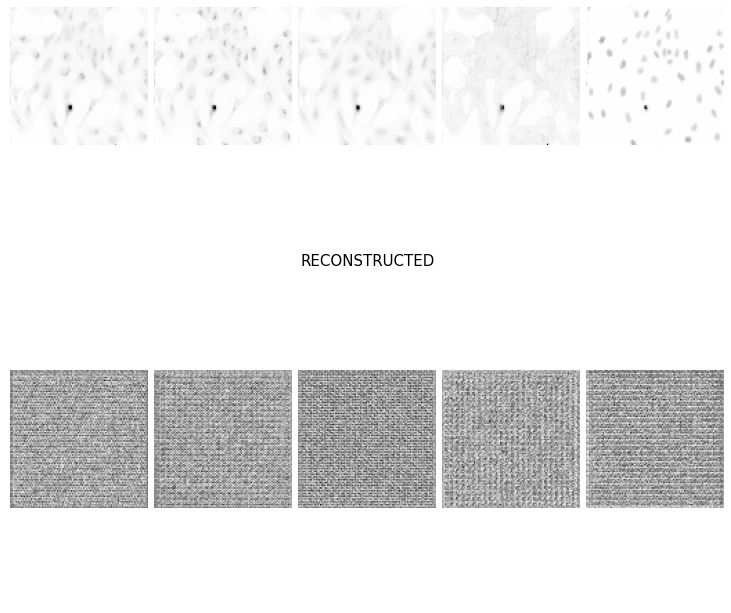

In [5]:
t.train()

In [6]:
t.model.module.history

{'train': {'epoch': []},
 'val': {'epoch': [1, 'final'],
  'loss': [18745.640584750236],
  'avg_validation_recon_loss': [18744.62881825782],
  'avg_validation_kld_loss': [1.011759028992703],
  'rmse': [0.3542993612988075, 0.3543003079332449],
  'bpd': [-0.5408556607880982, -0.5408575567121483],
  'a': [242]}}

In [ ]:
t.model.module.training

In [ ]:
model = t.model.module
checkpoint = torch.load('/home/icb/alessandro.palma/checkpoints/vae_run_res_100')
model.load_state_dict(checkpoint['model_state_dict'])

In [ ]:
data = next(iter(t.loader_train))

In [ ]:
data.keys()

In [ ]:
Plotter('').plot_channel_panel(tensor_to_image(data['X'][249]), 2, False, True, rgb = False)

In [ ]:
data['smile_id']

In [ ]:
Plotter.plot_channel_panel()